In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset
data = pd.read_csv("C:/Users/atibh/Downloads/spam_dataset.csv")

# Split data into features (X) and target (y)
X = data[['word1', 'word2', 'word3', 'word4']]
y = data['spam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Predictions and evaluation for Naive Bayes
naive_bayes_predictions = naive_bayes.predict(X_test)
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
print(f'Naive Bayes Accuracy: {naive_bayes_accuracy}')
print(classification_report(y_test, naive_bayes_predictions))

Naive Bayes Accuracy: 0.4
              precision    recall  f1-score   support

           0       0.44      0.80      0.57         5
           1       0.00      0.00      0.00         5

    accuracy                           0.40        10
   macro avg       0.22      0.40      0.29        10
weighted avg       0.22      0.40      0.29        10



In [11]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors as needed
knn.fit(X_train, y_train)

# Predictions and evaluation for KNN
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy}')
print(classification_report(y_test, knn_predictions))

KNN Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       0.50      0.40      0.44         5

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



In [12]:
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix for Naive Bayes
naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_predictions)
print("Confusion Matrix for Naive Bayes:")
print(naive_bayes_confusion_matrix)

Confusion Matrix for Naive Bayes:
[[4 1]
 [5 0]]


In [13]:
# Calculate confusion matrix for KNN
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix for KNN:")
print(knn_confusion_matrix)

Confusion Matrix for KNN:
[[3 2]
 [3 2]]


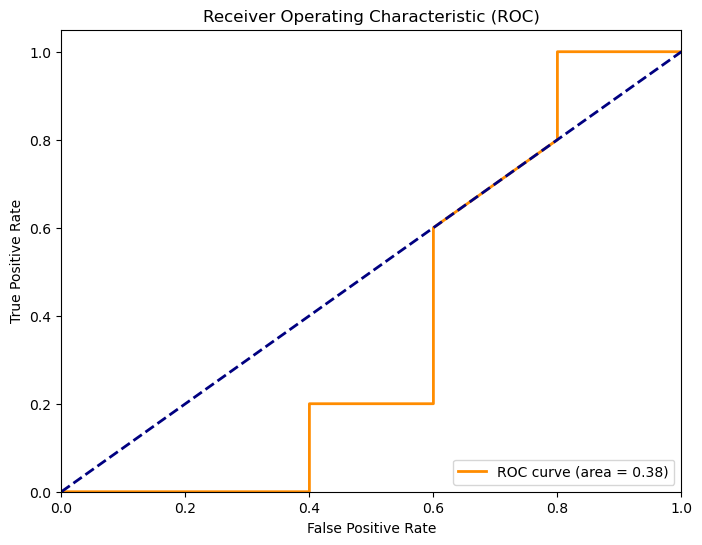

AUC Score: 0.38


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier (you can swap this with KNN or Decision Tree)
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores = classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

print("AUC Score: {:.2f}".format(roc_auc))